# [선형회귀모델 실습 : 모델링, 해석, 예측 성능 확인]

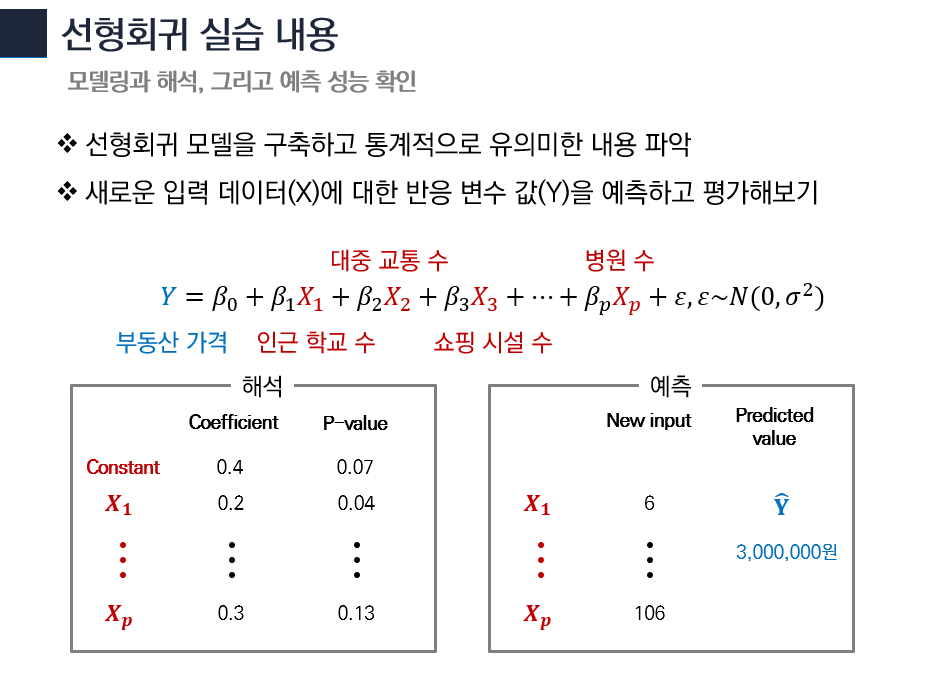

In [ ]:
# !pip install IPython ### 패키지 설치
# from IPython.display import Image
# Image('./images/linear_png_1.PNG') ### 로컬에서 이미지가 안 보이실 경우

# !git clone https://github.com/KU-DIC/LG_time_series_day03.git ### 코랩 이용하시는 분들 참고 (데이터 및 그림 다운로드)
# Image('/content/LG_time_series_day03/images/linear_png_1.PNG') ### 코랩 이용하시는 분 (이미지 안 보일 때)

## Jupyter notebook 간단 사용법
- 위에 셀 추가 : 셀 왼쪽 부분 클릭 후, 키보드 'a'키 
- 아래에 셀 추가 : 셀 왼쪽 부분 클릭 후, 키보드 'b'키
- 셀 삭제 : 셀 왼쪽 부분 클릭 후, 키보드 'd'키 두번
- 셀 유형 변경: 코드 모드 (esc + y), 마크 다운 모드 (esc + m)
- 특정 셀 실행 : ctrl + enter
- 주석 처리 : 원하는 코드 드래그 후 , ctrl + /
- 주석 입력 : #주석 기입 or '''주석기입'''
- 쥬피터 노트북 저장 : ctrl + s

## 모듈 불러오기

import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름

In [ ]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 경고 숨기기
import warnings
warnings.filterwarnings(action='ignore')

# !git clone https://github.com/KU-DIC/LG_time_series_day03.git

## 데이터 불러오기: Boston Housing Data

### https://archive.ics.uci.edu/ml/datasets.php

### 데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

### 설명 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

### 반응 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

In [ ]:
boston = load_boston()
print(boston.DESCR)

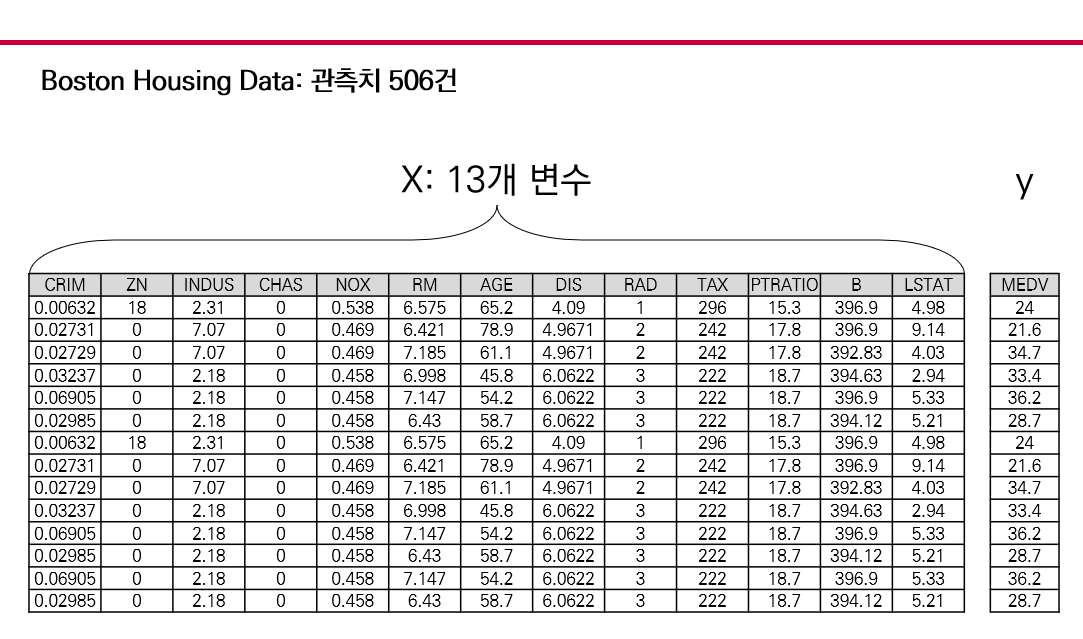

In [ ]:
# Image('./images/linear_png_2.PNG') ### 로컬 이용하시는 분 (이미지 안 보일 때)
# Image('/content/LG_time_series_day03/images/linear_png_2.PNG') ### 코랩 이용하시는 분 (이미지 안 보일 때)

In [ ]:
boston.data.shape # boston 데이터의 독립변수로만 이루어진 데이터프레임의 행과 열 개수 확인

In [ ]:
boston.data # boston 데이터의 독립변수로만 이루어진 데이터프레임

In [ ]:
boston.feature_names # boston 데이터의 독립변수 이름

In [ ]:
boston.target # boston 데이터의 타겟값(종속변수)

## 데이터 전처리

$\mathbf{X}$: 설명변수/입력변수 <br>
$\mathbf{y}$: 반응변수/출력변수

- 데이터 프레임

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [ ]:
X

In [ ]:
X.head()

In [ ]:
y.head()

- 데이터 병합

In [ ]:
data = pd.concat([X, y], axis=1) # X와 Y 변수 병합

In [ ]:
data.head(10)

## 탐색적 데이터 분석

.describe()를 이용하여 데이터 변수별 기초 통계량 값 확인 가능

In [ ]:
data.describe()

sns.pairplot을 이용하여 설명변수의 분포(히스토그램) 및 설명변수들 간의 관계(산점도)를 그리고, 특성을 파악

In [ ]:
sns.pairplot(data)
plt.show()

### 일부 변수만 선택하여 확인

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(data[['AGE', 'TAX', 'RM', 'MEDV']])
plt.show()

### 설명변수 간 상관계수(correlation) 확인

- data.corr(): 데이터 상관관계
- sns.heatmap(데이터, cmap= colormap 이름, annot=히트맵 안에 표시할 데이터)


In [ ]:
X.corr()  # 13X13 matirx

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), cmap=sns.color_palette("coolwarm", 10), annot=X.corr())
plt.show()

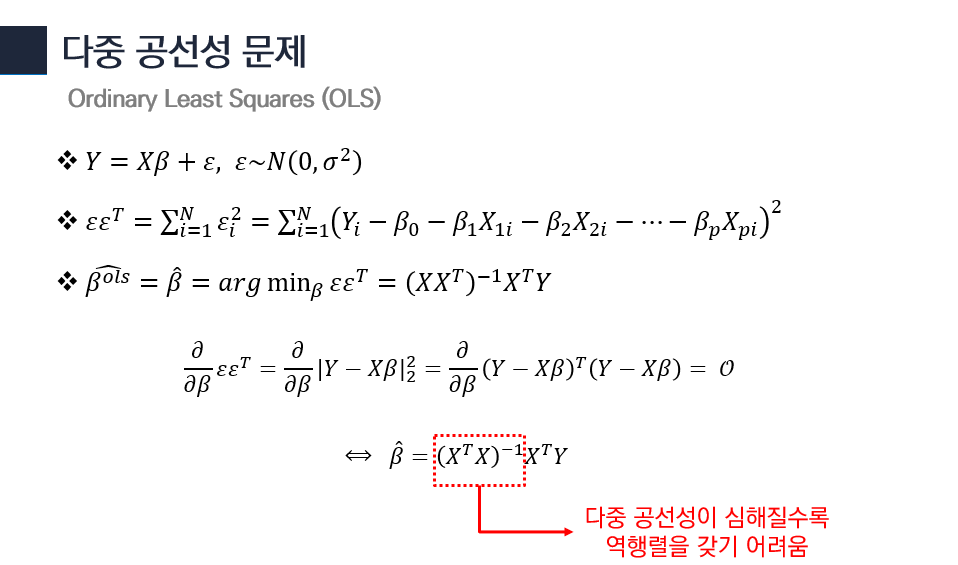

In [ ]:
# Image('./images/linear_png_3.PNG') ### 로컬 이용하시는 분 (이미지 안 보일 때)
# Image('/content/LG_time_series_day03/images/linear_png_3.PNG') ### 코랩 이용하시는 분 (이미지 안 보일 때)

## 모델링

### statsmodels의 OLS를 사용하여 선형회귀분석 시행 (OLS: Ordinary Least Squares)
 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
 - 모델 선언: model = sm.OLS(Y데이터, X데이터)   
 - 모델 학습: model_trained = model.fit()

In [ ]:
added_constant_X=sm.add_constant(data.drop(['MEDV'], axis=1))
added_constant_X.head(5)

In [ ]:
model_sm = sm.OLS(data['MEDV'], added_constant_X)

In [ ]:
model_trained_sm = model_sm.fit()

### statsmodels의 OLS 모델 해석
- R-squared (결정계수,coefficient of determination):모형의 성능
- coef (회귀계수): X가 한단위 증가할 때 Y의 변화량
- P>[t] (p-value):0.05(유의수준) 이하일 때 변수가 유의미

In [ ]:
display(model_trained_sm.summary())

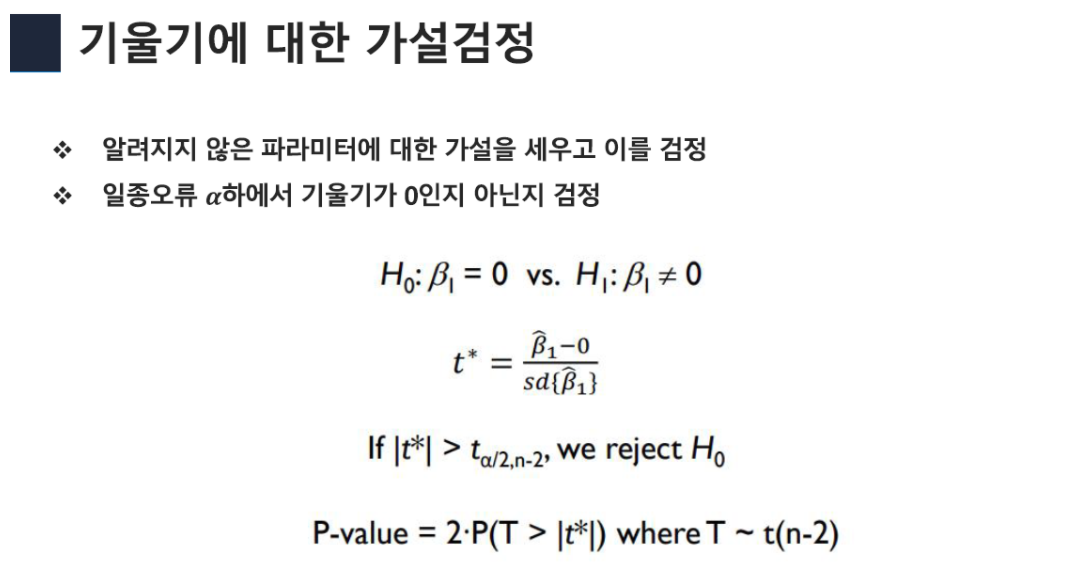

In [ ]:
# Image('./images/linear_png_4.PNG') ### 로컬 이용하시는 분 (이미지 안 보일 때)
# Image('/content/LG_time_series_day03/images/linear_png_4.PNG') ### 코랩 이용하시는 분 (이미지 안 보일 때)

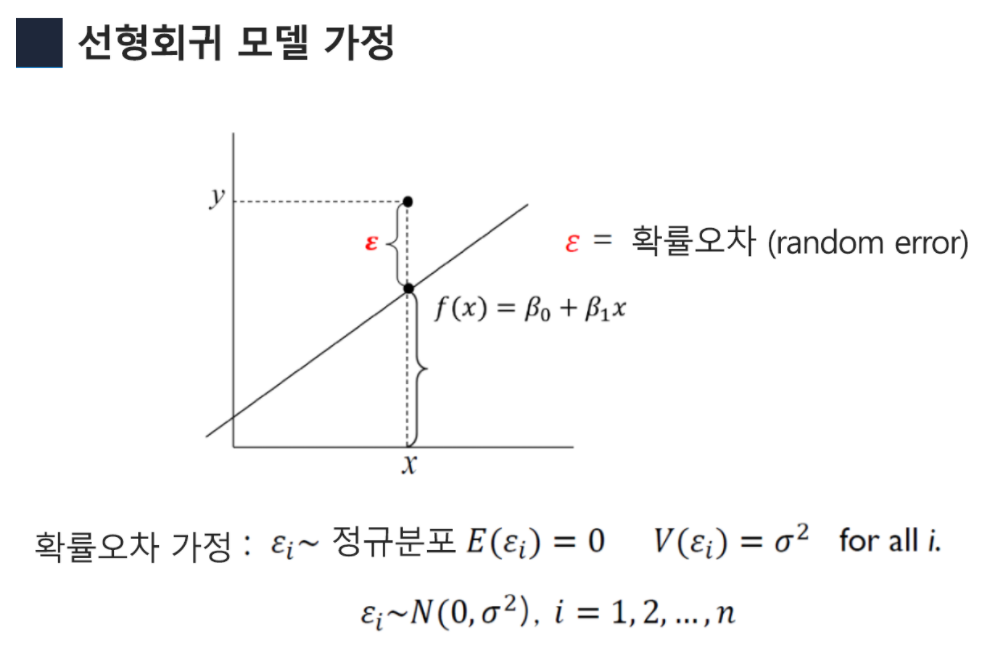

In [ ]:
# Image('./images/linear_png_5.PNG') ### 로컬 이용하시는 분 (이미지 안 보일 때)
# Image('/content/LG_time_series_day03/images/linear_png_5.PNG') ### 코랩 이용하시는 분 (이미지 안 보일 때)

#### 확률오차의 정규성 확인

In [ ]:
model_residuals = model_trained_sm.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#### 확률오차의 등분산성 확인

In [ ]:
model_fitted_y= model_trained_sm.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, data['MEDV'], data=added_constant_X, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

### sklearn의 LinearRegression 모듈을 사용하여 선형회귀분석 시행
 - 모델 선언: model = LinearRegression()   
 - 모델 학습: model.fit(X,y)
 - 모델 파라미터(상수항 미포함): model.coef_
 - 모델 상수항: model.intercept_

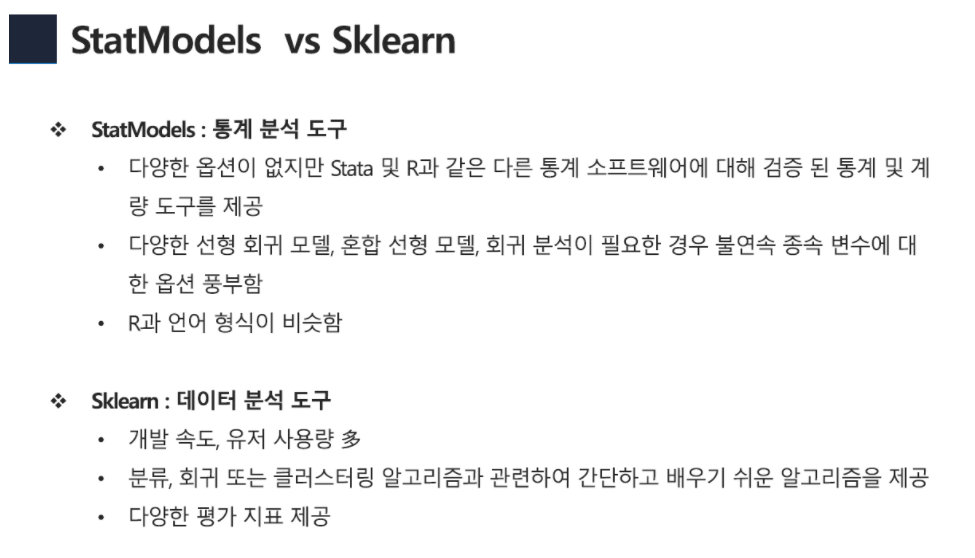

In [ ]:
# Image('./images/linear_png_6.PNG') ### 로컬 이용하시는 분 (이미지 안 보일 때)
# Image('/content/LG_time_series_day03/images/linear_png_6.PNG') ### 코랩 이용하시는 분 (이미지 안 보일 때)

In [ ]:
model_sklearn = LinearRegression()
model_sklearn.fit(X=data.drop(["MEDV"],axis=1),y=data['MEDV'])

In [ ]:
model_sklearn.coef_

In [ ]:
model_sklearn.intercept_

## 실제값 vs. 모델 출력 값 비교
 - predicted_values = trained_model.predict(new_data)

### 실제값 - 모델 출력 값 산점도를 통한 비교

In [ ]:
y_predicted_sklearn = model_sklearn.predict(data.drop(["MEDV"],axis=1))

In [ ]:
y_predicted_sm = model_trained_sm.fittedvalues
y_predicted_sm.head()

In [ ]:
y_predicted_sm = model_trained_sm.predict(added_constant_X)
y_predicted_sm.head()

In [ ]:
fig_values = np.concatenate([y.values.squeeze(), y_predicted_sm.values.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('true vs. predicted')
plt.scatter(y, y_predicted_sm)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('true', size=16)
plt.ylabel('predicted', size=16)
plt.show()

### 모델 출력 값 평가를 위한 지표들

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

###  Mean Squared Error (평균 제곱 오차): <br>
$\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$   

In [ ]:
print(mean_squared_error(y.values.squeeze(), y_predicted_sm.values.squeeze()))

###  Root Mean Squared Error (평균 제곱근 오차): <br>
$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [ ]:
print(np.sqrt(mean_squared_error(y.values.squeeze(),y_predicted_sm.values.squeeze())))

### Mean Absolute Error (평균 절대 오차): <br>
$\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$



In [ ]:
print(mean_absolute_error(y.values.squeeze(), y_predicted_sm.values.squeeze()))

###  Mean Absolute Percentage Error (평균 절대 백분율 오차): <br>
$\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

In [ ]:
print(mean_absolute_percentage_error(y.values.squeeze(), y_predicted_sm.values.squeeze()))

###  Correlation Coefficient (상관계수)

In [ ]:
print(np.corrcoef(data['MEDV'].values.flatten(), y_predicted_sm.values.squeeze()))

In [ ]:
print(r2_score(y, y_predicted_sm)) # 결정 계수

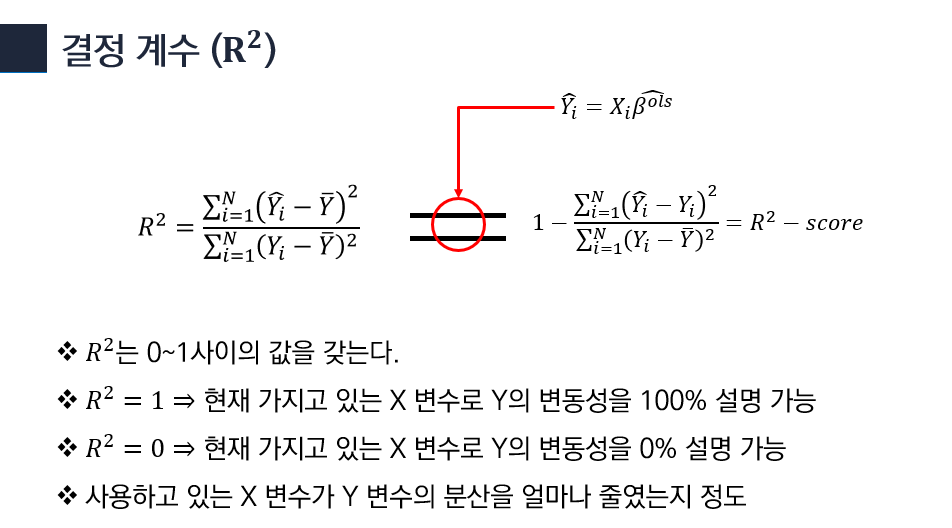

In [ ]:
# Image('./images/linear_png_7.PNG') ### 로컬 이용하시는 분 (이미지 안 보일 때)
# Image('/content/LG_time_series_day03/images/linear_png_7.PNG') ### 코랩 이용하시는 분 (이미지 안 보일 때)

### testing data 기준 예측 성능 평가

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=.20,random_state=0)
print(data.shape)
print(train.shape)
print(test.shape)

In [ ]:
model = LinearRegression()
model.fit(X=train.drop(["MEDV"],axis=1), y=train['MEDV'])

In [ ]:
testing_predicted_values = model.predict(test.drop(["MEDV"],axis=1))
testing_real_values = test["MEDV"].values

training_predicted_values = model.predict(train.drop(["MEDV"],axis=1))
training_real_values = train["MEDV"].values

### 결과 정리

In [ ]:
print('Training MSE: {:.3f}'.format(mean_squared_error(training_real_values, training_predicted_values)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(training_real_values,training_predicted_values))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(training_real_values, training_predicted_values)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(training_real_values, training_predicted_values)))
print('Training R2: {:.3f}'.format(r2_score(training_real_values, training_predicted_values)))

In [ ]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(testing_real_values, testing_predicted_values)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(testing_real_values,testing_predicted_values))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(testing_real_values, testing_predicted_values)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(testing_real_values, testing_predicted_values)))
print('Testing R2: {:.3f}'.format(r2_score(testing_real_values, testing_predicted_values)))

In [ ]:
fig_values = np.concatenate([testing_real_values.squeeze(), testing_predicted_values.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('true vs. predicted')
plt.scatter(testing_real_values.squeeze(), testing_predicted_values.squeeze())
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('true', size=16)
plt.ylabel('predicted', size=16)
plt.show()

# EOD